# 베스트 모델
### - 이진 분류: 유방암 예측 사례

In [1]:
import numpy as np
import matplotlib as plt

- 데이터 준비

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

### 1. 베스트 모델 저장하고 불러오기

- 모델 정의

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
model = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


In [7]:
# model compile
model.compile('adam', 'binary_crossentropy', ['accuracy'])

- Callback 설정 - 베스트 모델 저장

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_path = 'best_model.h5'
mc = ModelCheckpoint(
    filepath=model_path,                # 저장할 파일 이름
    monitor='val_loss',                 # validation dataset의 loss값 기준
    verbose=1,                          # 화면에 잔뜩 표시
    save_best_only=True                 # best model만 저장
)

- 모델 학습

In [9]:
hist = model.fit(X_train, y_train, validation_split=0.2, verbose=1,
                 epochs=100, batch_size=50,
                 callbacks=[mc])

Epoch 1/100
1/8 [==>...........................] - ETA: 8s - loss: 0.6184 - accuracy: 0.7400
Epoch 1: val_loss improved from inf to 0.40904, saving model to best_model.h5
8/8 [==============================] - 2s 78ms/step - loss: 0.5098 - accuracy: 0.8379 - val_loss: 0.4090 - val_accuracy: 0.8791
Epoch 2/100
1/8 [==>...........................] - ETA: 0s - loss: 0.3775 - accuracy: 0.9400
Epoch 2: val_loss improved from 0.40904 to 0.30125, saving model to best_model.h5
8/8 [==============================] - 0s 31ms/step - loss: 0.3335 - accuracy: 0.9148 - val_loss: 0.3013 - val_accuracy: 0.8901
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.9400
Epoch 3: val_loss improved from 0.30125 to 0.24189, saving model to best_model.h5
8/8 [==============================] - 0s 15ms/step - loss: 0.2409 - accuracy: 0.9258 - val_loss: 0.2419 - val_accuracy: 0.9011
Epoch 4/100
1/8 [==>...........................] - ETA: 0s - loss: 0.2555 - accuracy: 0.8800
Ep

- 베스트 모델 불러오기

In [10]:
from tensorflow.keras.models import load_model

best_model = load_model(model_path)

- 베스트 모델로 평가

In [11]:
best_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.9912


[0.034577008336782455, 0.9912280440330505]

- 모델 훈련 시각화

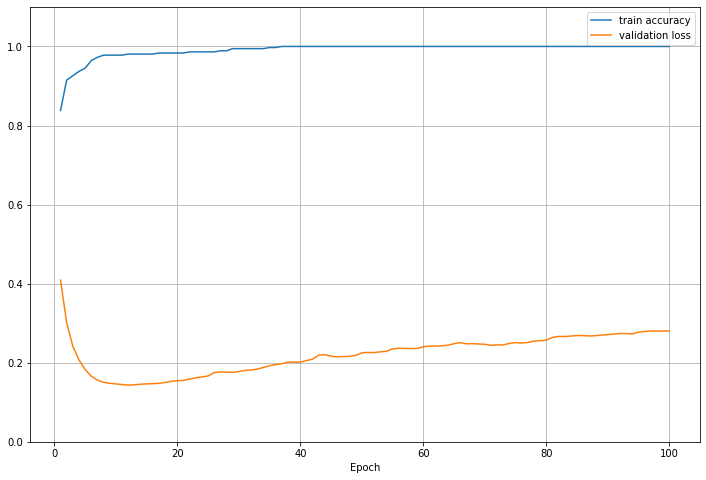

In [12]:
import matplotlib.pyplot as plt

y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.show()

### 2. 베스트 모델 저장하고 조기 종료하기

- Dropout layer 추가

In [13]:
from tensorflow.keras.layers import Dropout

model2 = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


In [14]:
# model compile
model2.compile('adam', 'binary_crossentropy', ['accuracy'])

- 조기 종료 조건 설정

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='val_loss',
    patience=20                     # 20 epoch 동안 val_loss가 좋아지지 않으면 강제 종료
)

In [16]:
model_path2 = 'best_model2.h5'
mc2 = ModelCheckpoint(filepath=model_path2, monitor='val_loss', verbose=1,
                      save_best_only=True)

In [17]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                   verbose=1, epochs=100, batch_size=50,
                   callbacks=[mc, es])

Epoch 1/100
1/8 [==>...........................] - ETA: 3s - loss: 0.6625 - accuracy: 0.6600
Epoch 1: val_loss did not improve from 0.14345
8/8 [==============================] - 1s 29ms/step - loss: 0.6031 - accuracy: 0.6676 - val_loss: 0.4573 - val_accuracy: 0.8901
Epoch 2/100
1/8 [==>...........................] - ETA: 0s - loss: 0.5179 - accuracy: 0.7800
Epoch 2: val_loss did not improve from 0.14345
8/8 [==============================] - 0s 7ms/step - loss: 0.4716 - accuracy: 0.8269 - val_loss: 0.3414 - val_accuracy: 0.9231
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 0.3655 - accuracy: 0.9000
Epoch 3: val_loss did not improve from 0.14345
8/8 [==============================] - 0s 8ms/step - loss: 0.3501 - accuracy: 0.9066 - val_loss: 0.2686 - val_accuracy: 0.9231
Epoch 4/100
1/8 [==>...........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8400
Epoch 4: val_loss did not improve from 0.14345
8/8 [==============================] - 0s 6ms/step - loss:

In [18]:
best_model2 = load_model(model_path2)
best_model2.evaluate(X_train, y_train)

15/15 [==============================] - 0s 5ms/step - loss: 0.0574 - accuracy: 0.9802


[0.05743720009922981, 0.9802197813987732]